In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

CLEAN_PATH = "../data/processed/healthcare_cleaned.csv"
df = pd.read_csv(CLEAN_PATH)

df["Date_of_Admission"] = pd.to_datetime(df["Date_of_Admission"])
df["Discharge_Date"] = pd.to_datetime(df["Discharge_Date"])

os.makedirs("../outputs", exist_ok=True)

df.head()


,Name,Age,Gender,Blood_Type,Medical_Condition,Date_of_Admission,Doctor,Hospital,Insurance_Provider,Billing_Amount,Room_Number,Admission_Type,Discharge_Date,Medication,Test_Results,Length_of_Stay,Billing_Outlier,LOS_Outlier
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,2,False,False
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6,False,False
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,15,False,False
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,30,False,False
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,20,False,False


In [2]:
kpis = {
    "Total Records": len(df),
    "Unique Patients": df["Name"].nunique(),
    "Unique Hospitals": df["Hospital"].nunique(),
    "Unique Doctors": df["Doctor"].nunique(),
    "Unique Insurance Providers": df["Insurance_Provider"].nunique(),
    "Average Billing Amount ($)": round(df["Billing_Amount"].mean(), 2),
    "Median Billing Amount ($)": round(df["Billing_Amount"].median(), 2),
    "Average Length of Stay (days)": round(df["Length_of_Stay"].mean(), 2),
    "Most Common Condition": df["Medical_Condition"].mode()[0],
    "Most Common Admission Type": df["Admission_Type"].mode()[0],
    "Most Common Test Result": df["Test_Results"].mode()[0],
}

pd.DataFrame([kpis])


,Total Records,Unique Patients,Unique Hospitals,Unique Doctors,Unique Insurance Providers,Average Billing Amount ($),Median Billing Amount ($),Average Length of Stay (days),Most Common Condition,Most Common Admission Type,Most Common Test Result
0,54966,40235,39876,40341,5,25544.31,25542.75,15.5,Arthritis,Elective,Abnormal


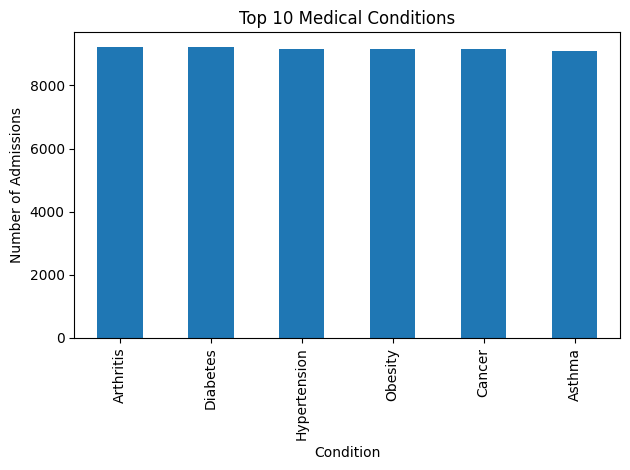

In [3]:
top_conditions = df["Medical_Condition"].value_counts().head(10)

plt.figure()
top_conditions.plot(kind="bar")
plt.title("Top 10 Medical Conditions")
plt.xlabel("Condition")
plt.ylabel("Number of Admissions")
plt.tight_layout()
plt.savefig("../outputs/top_conditions.png", dpi=200)
plt.show()


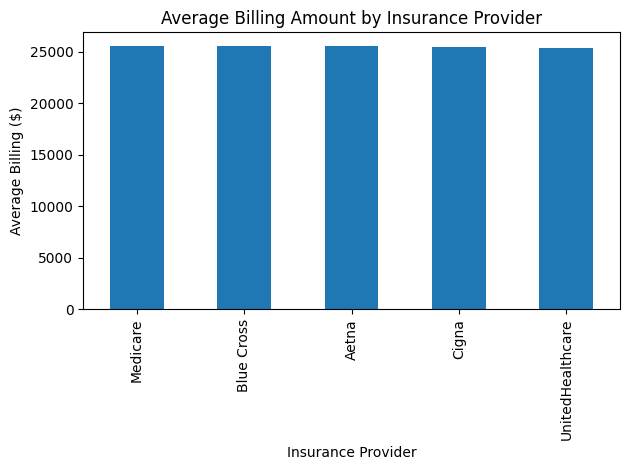

In [4]:
avg_billing = (
    df.groupby("Insurance_Provider")["Billing_Amount"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure()
avg_billing.plot(kind="bar")
plt.title("Average Billing Amount by Insurance Provider")
plt.xlabel("Insurance Provider")
plt.ylabel("Average Billing ($)")
plt.tight_layout()
plt.savefig("../outputs/avg_billing_by_insurance.png", dpi=200)
plt.show()


/tmp/ipykernel_624404/4206596092.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")


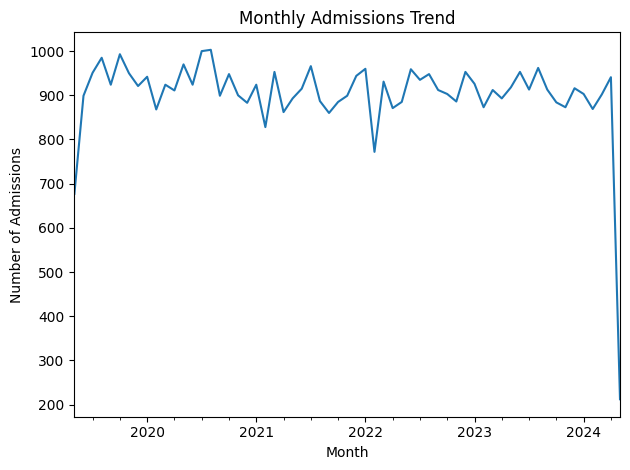

In [5]:
monthly_admissions = (
    df.set_index("Date_of_Admission")
    .resample("M")
    .size()
)

plt.figure()
monthly_admissions.plot()
plt.title("Monthly Admissions Trend")
plt.xlabel("Month")
plt.ylabel("Number of Admissions")
plt.tight_layout()
plt.savefig("../outputs/monthly_admissions_trend.png", dpi=200)
plt.show()


In [6]:
los_by_condition = (
    df.groupby("Medical_Condition")["Length_of_Stay"]
    .mean()
    .sort_values(ascending=False)
)

los_by_condition.head(10)


Medical_Condition
Asthma          15.677295
Arthritis       15.504231
Cancer          15.501204
Obesity         15.447627
Hypertension    15.436236
Diabetes        15.430664
Name: Length_of_Stay, dtype: float64

In [7]:
high_cost = df.sort_values("Billing_Amount", ascending=False).head(20)

high_cost[[
    "Name",
    "Age",
    "Gender",
    "Medical_Condition",
    "Insurance_Provider",
    "Billing_Amount"
]]


,Name,Age,Gender,Medical_Condition,Insurance_Provider,Billing_Amount
36349,Todd Carrillo,51,Female,Hypertension,Blue Cross,52764.276736
51183,Karen Kline,74,Female,Cancer,UnitedHealthcare,52373.032374
34613,Karen Kline,79,Female,Cancer,UnitedHealthcare,52373.032374
5735,David Sandoval,22,Male,Hypertension,Blue Cross,52271.663747
7088,Kathryn Gonzales,18,Female,Diabetes,Aetna,52211.852966
1574,Brett Marshall,42,Female,Asthma,Aetna,52181.837792
6663,Laurie Hood,42,Female,Arthritis,Cigna,52170.036854
52551,Laurie Hood,43,Female,Arthritis,Cigna,52170.036854
33117,Justin Clark,53,Female,Cancer,UnitedHealthcare,52154.237722
34368,Scott Powell,38,Female,Cancer,Cigna,52102.240889


In [8]:
import sqlite3

db_path = "../healthcare.db"
conn = sqlite3.connect(db_path)

# SQLite needs string dates
df_sql = df.copy()
df_sql["Date_of_Admission"] = df_sql["Date_of_Admission"].dt.strftime("%Y-%m-%d")
df_sql["Discharge_Date"] = df_sql["Discharge_Date"].dt.strftime("%Y-%m-%d")

df_sql.to_sql("healthcare", conn, if_exists="replace", index=False)

import pandas as pd
pd.read_sql_query("SELECT COUNT(*) AS rows FROM healthcare;", conn)


,rows
0,54966


In [9]:
queries = {
    "Admissions by Type": """
        SELECT Admission_Type, COUNT(*) AS cnt
        FROM healthcare
        GROUP BY Admission_Type
        ORDER BY cnt DESC;
    """,
    "Top 10 Medical Conditions": """
        SELECT Medical_Condition, COUNT(*) AS cnt
        FROM healthcare
        GROUP BY Medical_Condition
        ORDER BY cnt DESC
        LIMIT 10;
    """,
    "Avg Billing by Insurance": """
        SELECT Insurance_Provider, ROUND(AVG(Billing_Amount), 2) AS avg_billing
        FROM healthcare
        GROUP BY Insurance_Provider
        ORDER BY avg_billing DESC;
    """,
    "Monthly Admissions Trend": """
        SELECT substr(Date_of_Admission, 1, 7) AS month, COUNT(*) AS admissions
        FROM healthcare
        GROUP BY month
        ORDER BY month;
    """,
    "Avg LOS by Condition": """
        SELECT Medical_Condition,
               ROUND(AVG(julianday(Discharge_Date) - julianday(Date_of_Admission)), 2) AS avg_los_days
        FROM healthcare
        GROUP BY Medical_Condition
        ORDER BY avg_los_days DESC;
    """,
    "Top Hospitals by Total Billing": """
        SELECT Hospital, ROUND(SUM(Billing_Amount), 2) AS total_billing
        FROM healthcare
        GROUP BY Hospital
        ORDER BY total_billing DESC
        LIMIT 10;
    """
}

for title, q in queries.items():
    print("\n===", title, "===")
    display(pd.read_sql_query(q, conn))



=== Admissions by Type ===


,Admission_Type,cnt
0,Elective,18473
1,Urgent,18391
2,Emergency,18102



=== Top 10 Medical Conditions ===


,Medical_Condition,cnt
0,Arthritis,9218
1,Diabetes,9216
2,Hypertension,9151
3,Obesity,9146
4,Cancer,9140
5,Asthma,9095



=== Avg Billing by Insurance ===


,Insurance_Provider,avg_billing
0,Medicare,25628.32
1,Blue Cross,25603.46
2,Aetna,25549.69
3,Cigna,25526.00
4,UnitedHealthcare,25414.51



=== Monthly Admissions Trend ===


,month,admissions
0,2019-05,677
1,2019-06,899
2,2019-07,951
3,2019-08,985
4,2019-09,924
...,...,...
56,2024-01,903
57,2024-02,869
58,2024-03,902
59,2024-04,941



=== Avg LOS by Condition ===


,Medical_Condition,avg_los_days
0,Asthma,15.68
1,Arthritis,15.50
2,Cancer,15.50
3,Obesity,15.45
4,Hypertension,15.44
5,Diabetes,15.43



=== Top Hospitals by Total Billing ===


,Hospital,total_billing
0,Johnson PLC,1081477.31
1,LLC Smith,1030189.87
2,Smith PLC,1029424.45
3,Ltd Smith,1003365.53
4,Smith Ltd,970035.87
5,Johnson Inc,934310.73
6,Group Smith,902975.79
7,Inc Brown,877961.31
8,LLC Johnson,816438.35
9,Smith Group,806631.29


In [10]:
import os
os.makedirs("../sql", exist_ok=True)

with open("../sql/queries.sql", "w") as f:
    f.write("-- Healthcare SQL Portfolio Queries (SQLite)\n\n")
    for title, q in queries.items():
        f.write(f"-- {title}\n")
        f.write(q.strip() + "\n\n")

print("Saved: ../sql/queries.sql")


Saved: ../sql/queries.sql


In [11]:
conn.close()
print("Closed DB")


Closed DB
